# Testing Cost Smoothing

In [13]:
# Import Libraries needed by the Lambda Function
import sys
import datetime
import math
import numpy as np
import h5py
import scipy
import os
from os import environ
import json
from json import dumps, loads
from boto3 import client, resource, Session
import botocore
import uuid
import io
import matplotlib.pyplot as plt

# Global Variables
rgn = 'us-west-2'
s3_client = client('s3', region_name=rgn) # S3 access
s3_resource = resource('s3')
dynamo_client = client('dynamodb', region_name=rgn)
dynamo_resource = resource('dynamodb', region_name=rgn)

In [14]:
# Set default paramaters
epochs = 3000
batches = 4
smoothing_constant = 0.01

In [15]:
# Consolidate the results from the parallel mini-batches.
# DynamoDB and determine which mini-batch has the lowest
# Error.
Total = []
table = dynamo_resource.Table('Costs')
for e in range(epochs):
    Costs = []
    response = table.get_item(
        Key={
            'epoch': e
        }
    )
    item = response['Item']
    # Get the cost for each mini-batch
    for k, v in item.items():
        if 'batch' in k:
            Costs.append(float(v))
    avg_cost = np.average(Costs)
    if e == 0:
        moving_cost = avg_cost
    else:
        moving_cost = (1 - smoothing_constant) * moving_cost + (smoothing_constant) * avg_cost
    Total.append(moving_cost)

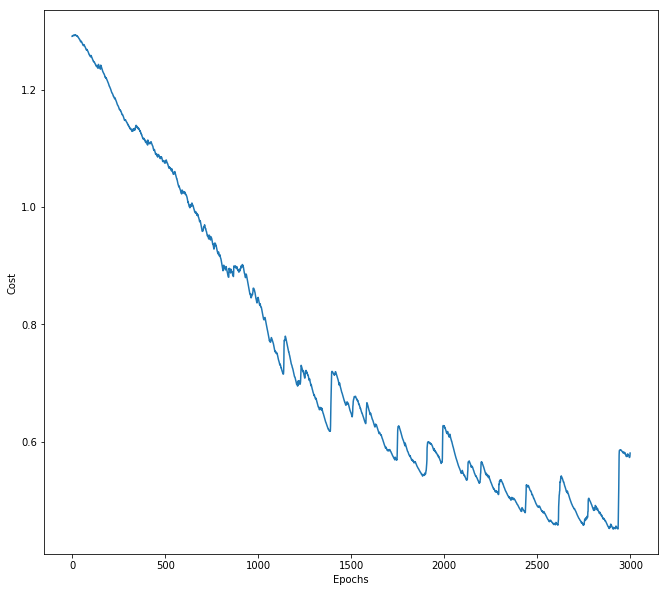

In [18]:
# Training Results Overview
%matplotlib inline
plt.rcParams['figure.figsize'] = (11.0, 10.0)
plt.plot(Total)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show;

In [11]:
for k, v in results.items():
    # Get the cost at each epoch
    if 'epoch' in k:
        costs.append(v.get('cost'))
    # Get the training start time
    elif 'Start' in k:
        start = datetime.datetime.strptime(v, "%Y-%m-%d %H:%M:%S.%f")
    # Get the training end time
    else:
        end = datetime.datetime.strptime(v, "%Y-%m-%d %H:%M:%S.%f")
delta = end - start
print("TotalEpochs: {}".format(NN_parameters['epochs']))
print("Total Processing time: {} Hours".format(int(delta.total_seconds() / 60 /60)))
print("Final Cost: {}".format(results.get('epoch' + str(NN_parameters['epochs']-1))['cost']))
# Plot the results
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title("Learning Rate: " + str(NN_parameters['learning_rate']))
plt.show;
print("Lowest Cost: {}".format(np.min(costs)))
print("Best Epoch: {}".format(np.argmin(costs)))

3000